# THE ELBOW METHOD
 .Determine the "K" value, the optimal clustering partition

K-Means is an unsupervised machine learning algorithm that groups data into k number of clusters. The number of clusters is user-defined and the algorithm will try to group the data even if this number is not optimal for the specific case.

Therefore we have to come up with a technique that somehow will help us decide how many clusters we should use for the K-Means model.

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

# The first step is to import the requiered python dependencies

---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

# Now we have to load our dataset using pandas. First you have to upload your "csv" file to google colab ( left folder ) and copy the route ( right click on the uploaded file)

---



In [3]:
# Import your dataset
cluster_credit_card = pd.read_csv("/content/credit card clean.csv") # creates a Pandas data frame for credit card dataset

# Let´s make a fast visualization, to see how it looks and to gather general info

---



In [4]:
print(cluster_credit_card) # rememeber to use print to don´t get lost

          BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0       40.900749           0.818182  ...          0.000000      12
1     3202.467416           0.909091  ...          0.222222      12
2     2495.148862           1.000000  ...          0.000000      12
3      817.714335           1.000000  ...          0.000000      12
4     1809.828751           1.000000  ...          0.000000      12
...           ...                ...  ...               ...     ...
8631     5.871712           0.500000  ...          0.000000       6
8632    28.493517           1.000000  ...          0.500000       6
8633    23.398673           0.833333  ...          0.250000       6
8634    13.457564           0.833333  ...          0.250000       6
8635   372.708075           0.666667  ...          0.000000       6

[8636 rows x 17 columns]


#  We want to explore our variables

---



In [5]:
# Show variables
cluster_credit_card.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# And we also need to now how is our type of data: string, douoble, integer, float...

---



In [6]:
cluster_credit_card.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

# Now, we can run our algorithm in order to get the optimal value

---



In [7]:
# Remember to add your data frame after the "fit" command
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_credit_card)
    distortions.append(kmeanModel.inertia_)

# And analyze how the elbow plot looks like

---



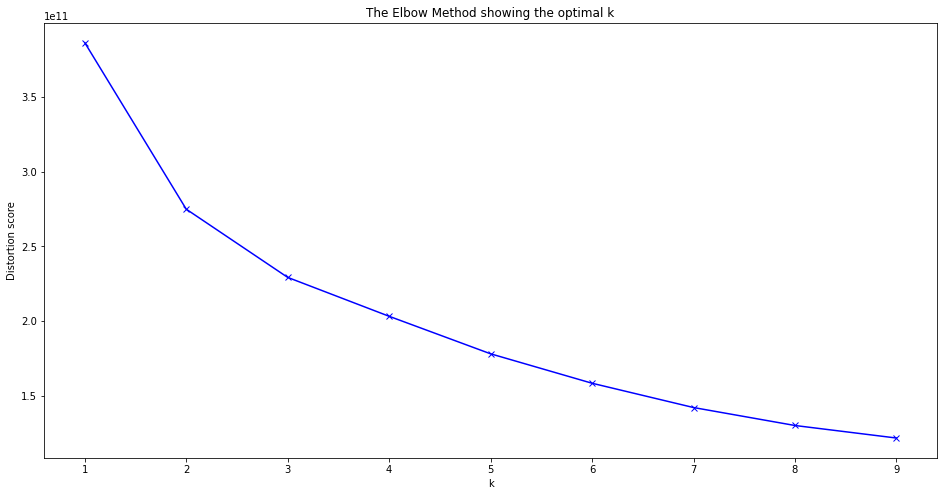

In [8]:
# Let´s plot our result
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# It seems that with this dataset we could obtaing good partitions from 3 till 6 clusters, so it means that in this range we could obtain good accuracy  for further algorithms implementations.

---



# SHILOUTTE SCORE
 .Determine the "K" value, the optimal clustering partition

In [10]:
# import libraries
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
#load the data
dataframe = pd.read_csv('/content/credit card clean.csv')
df = dataframe.copy(deep=True)


In [16]:
#Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [21]:
# fit the model for the whole range and print results

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df)
    preds = clusterer.predict(df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.511307699456009)
For n_clusters = 3, silhouette score is 0.4649592292907119)
For n_clusters = 4, silhouette score is 0.46049569919279437)
For n_clusters = 5, silhouette score is 0.4015896096337523)
For n_clusters = 6, silhouette score is 0.3716386527240559)
For n_clusters = 7, silhouette score is 0.36938585523825423)
For n_clusters = 8, silhouette score is 0.383338210364183)
For n_clusters = 9, silhouette score is 0.3534785540517469)


Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.